In [6]:
import pandas as pd
import world_trade_data as wits
import requests
# pd.set_option('display.max_rows', 6)

In [30]:
path1 = "../Resources/summer.csv"
df = pd.read_csv(path1)
print(df["Sport"].unique())

['Aquatics' 'Athletics' 'Cycling' 'Fencing' 'Gymnastics' 'Shooting'
 'Tennis' 'Weightlifting' 'Wrestling' 'Archery' 'Basque Pelota' 'Cricket'
 'Croquet' 'Equestrian' 'Football' 'Golf' 'Polo' 'Rowing' 'Rugby'
 'Sailing' 'Tug of War' 'Boxing' 'Lacrosse' 'Roque' 'Hockey'
 'Jeu de paume' 'Rackets' 'Skating' 'Water Motorsports'
 'Modern Pentathlon' 'Ice Hockey' 'Basketball' 'Canoe / Kayak' 'Handball'
 'Judo' 'Volleyball' 'Table Tennis' 'Badminton' 'Baseball' 'Softball'
 'Taekwondo' 'Triathlon' 'Canoe']


In [9]:
# Load data about all the Olympics
path = "../Resources/athlete_events.csv"
all_olymp = pd.read_csv(path)

### Is Hosting Olympics beneficial to the country?
On the example of "Rio 2016" - Summer Olympics 2016 that took place at Brazil
we will analyse how it affected the country

### How the hosting of Summer Olympics 2016 at Rio affected the number of medals Brazil won?
* Calculate the number of Gold Medals Brazil won over years
* Calculate the number of total Medals Brail won over years

In [10]:
# Create Data Frame for Brazil team 
brazil_all = all_olymp.loc[(all_olymp["Team"]=="Brazil")|(all_olymp["Team"]=="Brazil-1")]
brazil_all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


In [38]:
# Drop rows with NaN values as we need to calculate the number of medals Brazil won, so these rows are not informative
bra_athlets_medal = brazil_all.dropna(inplace = False)
bra_athlets_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver
268211,134186,"Jos Elias ""Z Elias"" Moedim Jnior",M,19.0,178.0,75.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze
268218,134190,"Jos Marco ""Z Marco"" Nobrega Ferreira de Melo",M,29.0,190.0,86.0,Brazil-1,BRA,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver
268219,134191,"Jos Marcelo ""Z Maria"" Ferreira",M,22.0,175.0,71.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze


In [40]:
# Search for duplicates, include Athlet ID, Games, Event and Medal
medal_duplicates = bra_athlets_medal.loc[bra_athlets_medal.duplicated(subset = ["ID", "Games", "Medal", "Event"])]
medal_duplicates

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [70]:
# Test column - search somethign particular
# check = bra_athlets_medal.loc[
#     (bra_athlets_medal["Year"]==1984)&(bra_athlets_medal["Event"]=="Volleyball Men's Volleyball")]
# check

check = bra_athlets_medal.loc[(bra_athlets_medal["Year"]==2016)]
check.to_csv("Output/medals.csv")
check

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4825,2758,Alison Conte Cerutti,M,30.0,203.0,106.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Gold
9260,5093,William Peixoto Arjona,M,37.0,186.0,78.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,Gold
14312,7716,Brbara Seixas de Freitas,F,29.0,178.0,67.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver
17468,9307,gatha Bednarczuk Rippel,F,33.0,182.0,70.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver
25807,13466,Maurcio Borges Almeida Silva,M,27.0,199.0,99.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,Gold
28565,14810,Thiago Braz da Silva,M,22.0,183.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Pole Vault,Gold
30654,15791,"Bruno ""Bruninho"" Mossa de Rezende",M,30.0,190.0,76.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,Gold
43889,22623,Robson Donato Conceio,M,27.0,171.0,57.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,Gold
47976,24724,Mayra Aguiar da Silva,F,25.0,177.0,78.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Half-Heavyweight,Bronze
47985,24730,Rafael Carlos da Silva,M,29.0,203.0,160.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,Bronze


In [56]:
test = bra_athlets_medal.loc[(bra_athlets_medal["Year"]==2016)&(bra_athlets_medal["Medal"]=="Gold")].sort_values(by = "Event")
# .groupby(["Year", "ID"]).count()
test

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
46586,24043,Joaquim Carvalho Cruz,M,21.0,187.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 800 metres,Gold


In [80]:
# Such Events as Volleyball Men's Volleyball, Volleyball Women's Volleybal,
# Football Men's Football, Football Women's Football
# Sailing Women's Skiff, Canoeing Men's Canadian Doubles, 1,000 metres
# are group event. To find the number of medal we should not include medal for each athlet
years = bra_athlets_medal["Year"].unique()
print(years)
group_events = ["Volleyball Men's Volleyball", "Volleyball Women's Volleyball",
                "Beach Volleyball Men's Beach Volleyball", "Beach Volleyball Women's Beach Volleybal",
                "Football Men's Football", "Football Women's Football",
                "Sailing Women's Skiff", "Canoeing Men's Canadian Doubles, 1,000 metres",
               "Athletics Men's 4 x 100 metres Relay", "Sailing Women's Two Person Dinghy",
               "Sailing Men's Two Person Keelboat"]

indices = []

# brazil_medals = pd.DataFrame(bra_athlets_medal)

# Iterate over Data Frame to locate indices of the "duplicates" medals
# by "duplicates" here we mean medal for a group event like "Volleyball Men's Volleyball"
for year in years:
    for event in group_events:
        all_index = bra_athlets_medal.loc[
            (bra_athlets_medal["Year"]==year)&(bra_athlets_medal["Event"]==event)].index
        if len(all_index)>0:
            for i in range(1, len(all_index)):
                indices.append(all_index[i])
        print(year)
        print(f"Test {all_index}")
        print(f"Indices {indices}")
        
brazil_medals = bra_athlets_medal.drop(indices, inplace=False)
brazil_medals

[1984 1988 2012 1996 2000 2008 1948 1960 2004 2016 1992 1964 1980 1968
 1976 1952 1956 1972]
1984
Test Int64Index([  5928,  12223,  20234,  20303,  57108,  68010, 149277, 162209,
            198970, 205929, 260884, 263727],
           dtype='int64')
Indices [12223, 20234, 20303, 57108, 68010, 149277, 162209, 198970, 205929, 260884, 263727]
1984
Test Int64Index([], dtype='int64')
Indices [12223, 20234, 20303, 57108, 68010, 149277, 162209, 198970, 205929, 260884, 263727]
1984
Test Int64Index([], dtype='int64')
Indices [12223, 20234, 20303, 57108, 68010, 149277, 162209, 198970, 205929, 260884, 263727]
1984
Test Int64Index([], dtype='int64')
Indices [12223, 20234, 20303, 57108, 68010, 149277, 162209, 198970, 205929, 260884, 263727]
1984
Test Int64Index([  1651,   7276,  40195,  46597,  49605,  59858,  75259,  79525,
            120289, 210415, 220141, 261703],
           dtype='int64')
Indices [12223, 20234, 20303, 57108, 68010, 149277, 162209, 198970, 205929, 260884, 263727, 7276, 40195, 

1972
Test Int64Index([], dtype='int64')
Indices [12223, 20234, 20303, 57108, 68010, 149277, 162209, 198970, 205929, 260884, 263727, 7276, 40195, 46597, 49605, 59858, 75259, 79525, 120289, 210415, 220141, 261703, 5323, 7208, 15904, 17002, 35368, 46557, 61363, 78078, 108798, 110595, 159501, 169906, 203705, 234828, 261704, 30653, 49145, 64677, 79029, 166249, 170192, 199960, 202402, 207258, 219324, 255949, 65710, 65728, 68341, 75752, 106507, 140131, 168477, 183394, 217960, 236135, 238256, 63347, 4562, 48703, 49009, 75584, 100754, 111006, 143418, 149036, 169907, 170377, 178464, 195716, 203910, 209883, 220077, 246978, 212476, 6447, 68006, 69414, 70731, 96064, 102025, 136154, 149187, 164151, 209877, 253186, 5860, 7244, 17003, 43885, 55339, 86122, 111321, 143752, 149025, 168224, 201264, 201647, 203924, 211624, 268211, 268219, 47905, 47994, 199848, 70732, 106112, 113635, 114473, 115684, 117932, 136155, 197083, 199958, 253187, 255807, 268218, 47909, 51302, 199849, 225792, 30652, 49144, 64676, 79

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258813,129573,Alexander Welter,M,27.0,186.0,75.0,Brazil,BRA,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed Multihull,Gold
263339,131784,Felipe Almeida Wu,M,24.0,169.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Silver
267294,133724,"Ilisaine Karen ""Zaine"" David",F,22.0,190.0,70.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Women's Basketball,Bronze
267707,133931,Arthur Nabarrete Zanetti,M,22.0,156.0,61.0,Brazil,BRA,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,Gold


In [81]:
# Test column after drop
check = brazil_medals.loc[(brazil_medals["Year"]==2008)]
# check.to_csv("Output/medals.csv")
check

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4561,2592,"Alexandre ""Alexandre Pato"" Rodrigues da Silva",M,18.0,179.0,71.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,Bronze
6761,3790,Anderson de Oliveira Rodrigues,M,34.0,190.0,95.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,Silver
7330,4101,Andria Suntaque,F,30.0,175.0,65.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Football,Football Women's Football,Silver
34253,17650,Tiago Henrique de Oliveira Camilo,M,26.0,180.0,90.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Half-Middleweight,Bronze
35850,18420,"Carolina ""Carol"" Demartini de Albuquerque",F,31.0,182.0,76.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,Gold
41794,21544,Csar Augusto Cielo Filho,M,21.0,195.0,80.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 50 metres Freestyle,Gold
41795,21544,Csar Augusto Cielo Filho,M,21.0,195.0,80.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 100 metres Freestyle,Bronze
50341,25906,Bruno Lins Tenrio de Barros,M,21.0,182.0,85.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
65738,33646,Fbio Luiz de Jesus Magalhes,M,29.0,204.0,101.0,Brazil-1,BRA,2008 Summer,2008,Summer,Beijing,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver
66162,33844,Natlia Falavigna Silva,F,24.0,178.0,69.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Heavyweight,Bronze


In [82]:
# Calculate the number of total Medals over years

total_medals = brazil_medals.groupby("Year")["Medal"].count()
total_medals

Year
1948     2
1952     2
1956     1
1960     8
1964    12
1968     4
1972     2
1976     3
1980     9
1984    10
1988     8
1992     2
1996    31
2000    30
2004    11
2008    15
2012    18
2016    20
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'Total number of Medals Brazil won over years'}, xlabel='Year', ylabel='Number of Total Medals'>

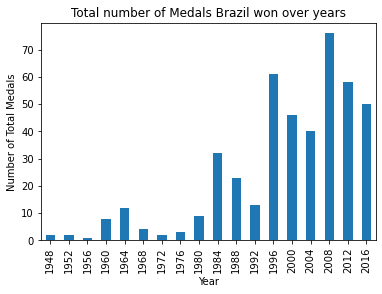

In [28]:
bar_plot = total_medals.plot(kind = "bar", title = "Total number of Medals Brazil won over years")
bar_plot.set_ylabel("Number of Total Medals")
bar_plot

In [2]:
wits.get_countries()

,name,notes,countrycode,isreporter,ispartner,isgroup,grouptype
iso3Code,,,,,,,
AFG,Afghanistan,,004,False,False,No,N/A
ALB,Albania,,008,False,False,No,N/A
DZA,Algeria,,012,False,False,No,N/A
ASM,American Samoa,,016,True,False,No,N/A
AND,Andorra,,020,False,False,No,N/A
...,...,...,...,...,...,...,...
YEM,Yemen,,887,False,False,No,N/A
YDR,Yemen Democratic,,720,True,False,No,N/A
YUG,"Yugoslavia,FR(Serbia/Montenegr",,890,True,False,No,N/A


In [3]:
wits.get_products()

,isgroup,nomenclaturecode,grouptype,productdescription,notes
productcode,,,,,
999999,N/A,N/A,N/A,Not Applicable,
01-05_Animal,Yes,H0,Sector,Animal,
06-15_Vegetable,Yes,H0,Sector,Vegetable,
16-24_FoodProd,Yes,H0,Sector,Food Products,
25-26_Minerals,Yes,H0,Sector,Minerals,
27-27_Fuels,Yes,H0,Sector,Fuels,
28-38_Chemicals,Yes,H0,Sector,Chemicals,
39-40_PlastiRub,Yes,H0,Sector,Plastic or Rubber,
41-43_HidesSkin,Yes,H0,Sector,Hides and Skins,
